# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how="outer")

# Display the data table for preview
complete_data.head(5)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
total_mice = complete_data['Mouse ID'].nunique()
total_mice

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = complete_data[complete_data.duplicated(subset=['Mouse ID', 'Timepoint'])]['Mouse ID'].unique()
duplicates


array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice = complete_data[complete_data.duplicated(['Mouse ID', 'Timepoint'])]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = complete_data[complete_data["Mouse ID"].isin(duplicates)==False]
clean_unique_mice = cleaned_data['Mouse ID'].nunique()
clean_unique_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen = cleaned_data.groupby('Drug Regimen')

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor = regimen['Tumor Volume (mm3)'].mean()
median_tumor = regimen['Tumor Volume (mm3)'].median()
var_tumor = regimen['Tumor Volume (mm3)'].var()
std_tumor = regimen['Tumor Volume (mm3)'].std()
sem_tumor = regimen['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.

stat_summary = pd.DataFrame({
    'Mean Tumor Volume': mean_tumor,
    'Median Tumor Volume': median_tumor,
    'Tumor Volume Variance': var_tumor,
    'Tumor Volume Std. Deviation': std_tumor,
    'Tumor Volume Std. Error': sem_tumor
}).reset_index()

stat_summary


,Drug Regimen,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Deviation,Tumor Volume Std. Error
0,Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
1,Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
2,Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
3,Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
4,Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
5,Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
6,Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
7,Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
8,Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
9,Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398


## Bar and Pie Charts

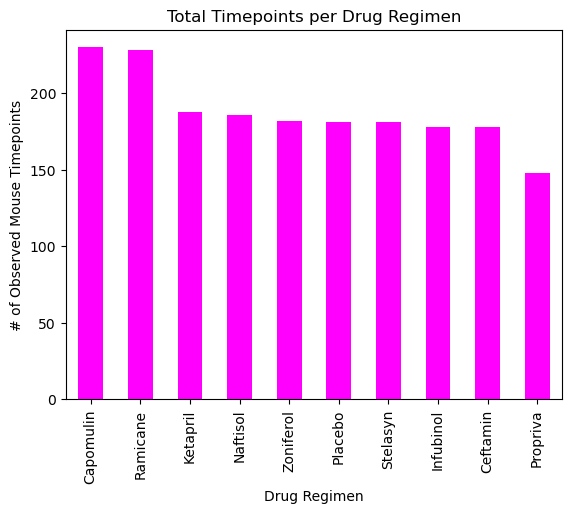

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoint_counts = cleaned_data['Drug Regimen'].value_counts()
timepoint_counts.plot(kind='bar', color= 'fuchsia', title='Total Timepoints per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()



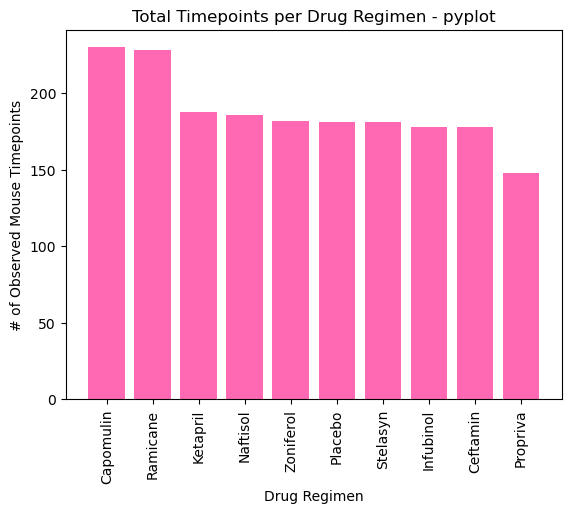

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.bar(timepoint_counts.index, timepoint_counts.values, color='hotpink')
plt.title('Total Timepoints per Drug Regimen - pyplot')
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.xticks(rotation="vertical")
plt.show()


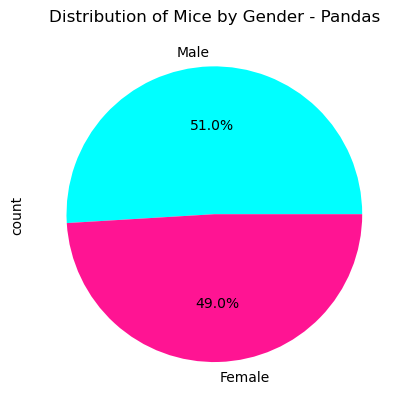

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_counts = cleaned_data['Sex'].value_counts()
colors = ['aqua', 'deeppink']
gender_counts.plot(kind='pie', colors=colors, title='Distribution of Mice by Gender - Pandas', autopct='%1.1f%%')
plt.show()

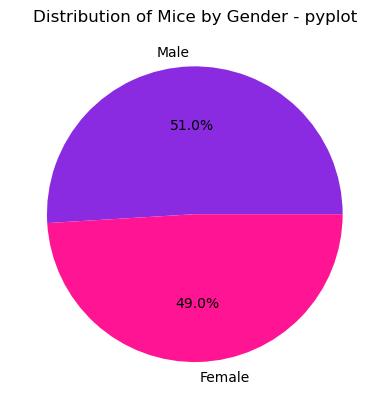

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ['blueviolet', 'deeppink']
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=colors)
plt.title('Distribution of Mice by Gender - pyplot')
plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
final_time = cleaned_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_df = pd.merge(final_time, cleaned_data, on=['Mouse ID', 'Timepoint'])


In [13]:
# Put treatments into a list for for loop (and later for plot labels)
drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
# Create empty list to fill with tumor vol data (for plotting)
tumor_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    tumor_volume = final_tumor_df[final_tumor_df['Drug Regimen'] == drug]['Tumor Volume (mm3)']
    tumor_data.append(tumor_volume)    
    
        
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume.quantile([0.25, 0.5, 0.75])
    upper_quartile = quartiles[0.75]
    lower_quartile = quartiles[0.25]
    iqr = upper_quartile - lower_quartile
    
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    outliers = tumor_volume[(tumor_volume < lower_bound) | (tumor_volume > upper_bound)]


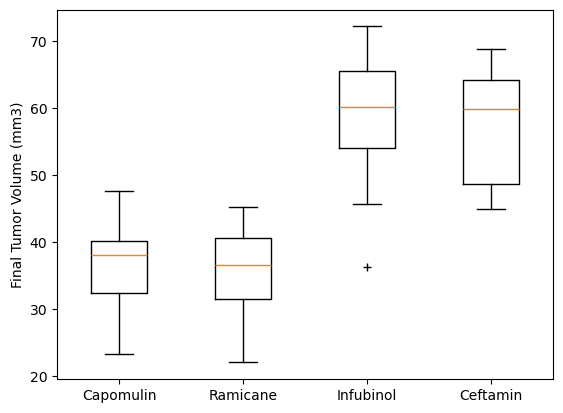

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_data, labels=drugs, flierprops={'marker': '+'})
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

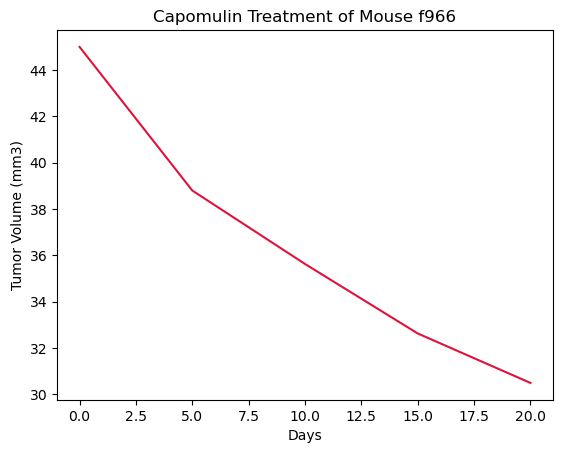

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = 'f966'
capomulin_mouse = cleaned_data[(cleaned_data['Mouse ID'] == mouse_id) & (cleaned_data['Drug Regimen'] == 'Capomulin')]

# Plotting
plt.plot(capomulin_mouse['Timepoint'], capomulin_mouse['Tumor Volume (mm3)'], color='crimson')
plt.title('Capomulin Treatment of Mouse ' + str(mouse_id))
plt.xlabel('Days')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

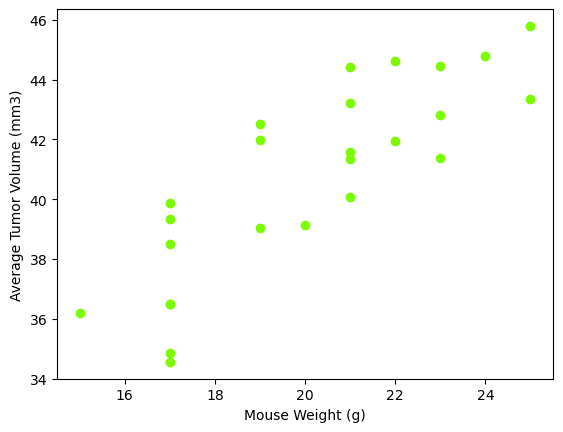

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capo_data = cleaned_data[cleaned_data['Drug Regimen'] == 'Capomulin']
mean_vol = capo_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
weight = capo_data.groupby('Mouse ID')['Weight (g)'].first()
 
# Plotting
plt.scatter(weight, mean_vol, marker='o', color='lawngreen')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


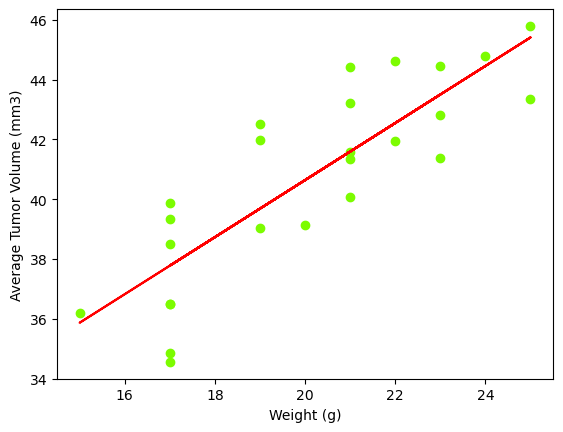

In [17]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# correlation coefficient
correlation = st.pearsonr(weight, mean_vol)[0]

# linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(weight, mean_vol)

# math
regression = f"y = {slope:.2f}x + {intercept:.2f}"

# scatter plot
plt.scatter(weight, mean_vol, marker='o', color='lawngreen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# regression plotting
plt.plot(weight, slope * weight + intercept, color='red', linestyle='-', label=regression)
print("The correlation between mouse weight and the average tumor volume is " + str(round(r_value,2)))
plt.show()
